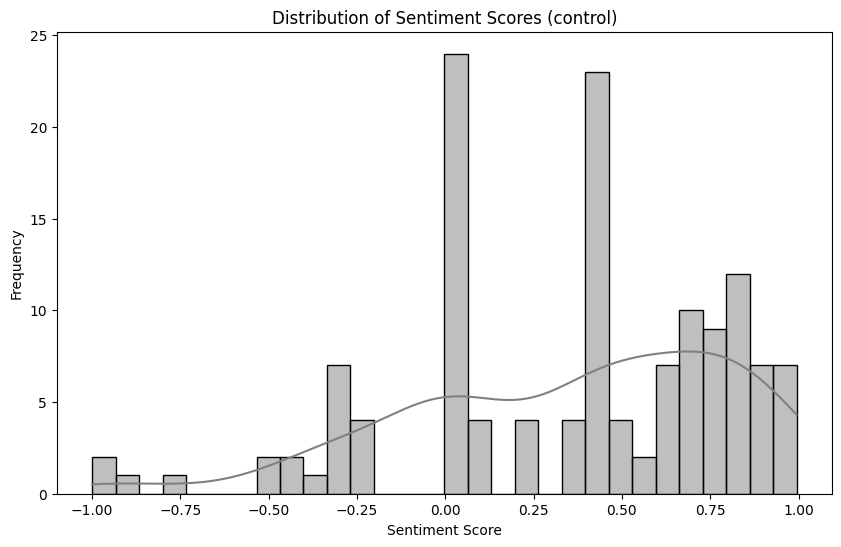

Average sentiment for control:
Platform
Telegram           0.950150
InstagramDirect    0.916720
FacebookDirect     0.776600
YouTube            0.439971
Facebook           0.416868
Twitter            0.255049
Rumble            -0.998900
Name: sentiment, dtype: float64


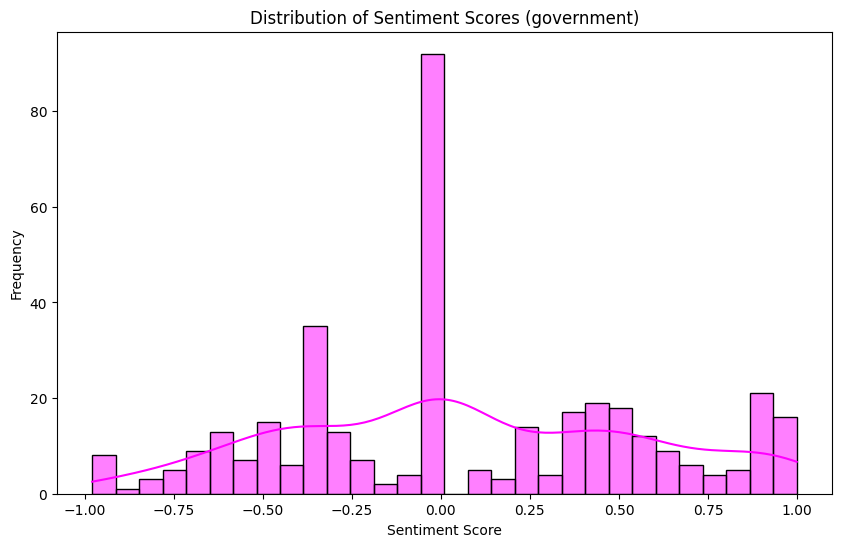

Average sentiment for government:
Platform
TikTok             0.406250
YouTube            0.343824
FacebookDirect     0.314668
InstagramDirect    0.174743
Instagram          0.130890
Facebook           0.100905
Threads            0.021750
Bluesky            0.000000
Twitter           -0.019200
Gab               -0.070233
Telegram          -0.147600
GETTR             -0.521100
TruthSocial       -0.585900
Name: sentiment, dtype: float64


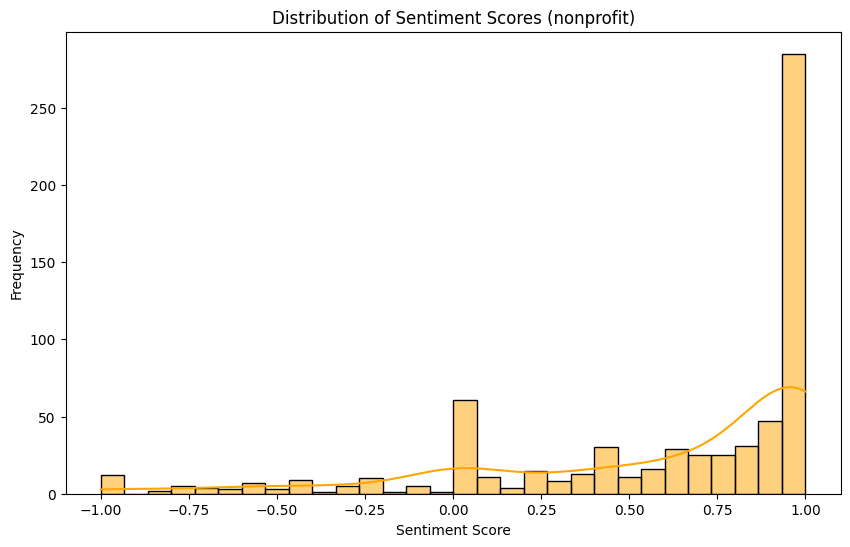

Average sentiment for nonprofit:
Platform
Podcast            0.930100
Rumble             0.886949
InstagramDirect    0.784272
Instagram          0.691450
Bluesky            0.685150
FacebookDirect     0.630030
Facebook           0.516203
YouTube            0.404465
TikTok             0.366900
Twitter            0.310242
Gab                0.071650
Telegram          -0.299700
Name: sentiment, dtype: float64


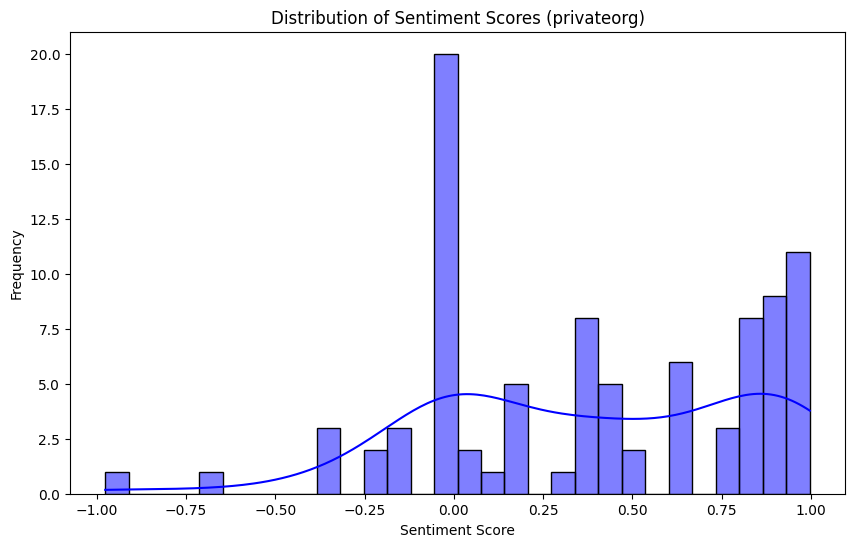

Average sentiment for privateorg:
Platform
InstagramDirect    0.905637
Instagram          0.718420
TikTok             0.670222
Facebook           0.303522
YouTube            0.278267
Twitter            0.221530
Name: sentiment, dtype: float64


In [3]:
dataset = ['control','government','nonprofit','privateorg']

import csv  
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Define color mapping for organization types
color_map = {
    'nonprofit': 'orange',
    'government': 'magenta',  
    'privateorg': 'blue',
    'control': 'gray'  
}

for data in dataset:
    analyzer = SentimentIntensityAnalyzer()

    def get_sentiment_scores(text):
        if isinstance(text, str):
            return analyzer.polarity_scores(text)['compound']
        return None  

    input_csv = f'datasets/combined/{data}_combined.csv'
    df = pd.read_csv(input_csv, quotechar='"')

    df['sentiment'] = df['post_body_text'].apply(get_sentiment_scores)

    output_csv = f'datasets/combined/{data}_combined_output.csv'
    df.to_csv(output_csv, index=False, quoting=csv.QUOTE_ALL)

    # Read CSV file
    df = pd.read_csv(output_csv)

    # Group by 'Platform' and calculate the average sentiment score
    avg_sentiment_df = df.groupby('Platform', as_index=False)['sentiment'].mean()

    # Save this table as CSV for future plotting
    sentiment_table_csv = f'datasets/combined/{data}_platform_sentiment.csv'
    avg_sentiment_df.to_csv(sentiment_table_csv, index=False)

    print(f'Sentiment table saved for {data} at {sentiment_table_csv}')

    # Plot sentiment distribution with assigned colors
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sentiment'], bins=30, kde=True, color=color_map.get(data, 'black'))  
    plt.title(f'Distribution of Sentiment Scores ({data})')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')

    plt.savefig(f"graphs/{data}_Sentiment.jpeg", dpi=300)
    plt.show()

    print(f'Average sentiment for {data}:')
    print(avg_sentiment_df)

